Install keras_vggface (Model yang sudah ada)

In [3]:
pip install keras_vggface

Algoritma Multi-Task Convoluted Neural Networks (MTCNN) untuk deteksi wajah

In [4]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 4.1MB/s 


Import Library

In [21]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image
from google.colab import files

Fungsi untuk menggambar kotak merah pada wajah

In [22]:
def highlight_faces(image_path, faces):
  image = plt.imread(image_path)
  plt.imshow(image)
  ax = plt.gca()
  for face in faces:
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,fill=False, color='red')
    ax.add_patch(face_border)
  plt.show()

Fungsi untuk mengekstrak "wajah" yang terdeteksi dari gambar

In [79]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)
  face_images = []

  for face in faces:
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height
    face_boundary = image[y1:y2, x1:x2]
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    face_images.append(face_array)

  fig = plt.figure()
  fig.set_size_inches(30, 30)
  axarr = fig.subplots(1,len(face_images))
  for idx,img in enumerate(face_images):
    axarr[idx].imshow(img)
  plt.show()

1 Fungsi untuk semuanya, mendeteksi dan meng-crop wajah yang terdeteksi

In [74]:
def detect(image_path):
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)
  highlight_faces(image_path,faces)
  extract_face_from_image(image_path)

Jalan kan ini untuk mengupload gambar yang ingin dideteksi wajah

Saving timnas-indonesia-u19_e8264a3.jpg to timnas-indonesia-u19_e8264a3.jpg


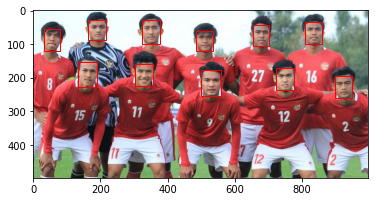

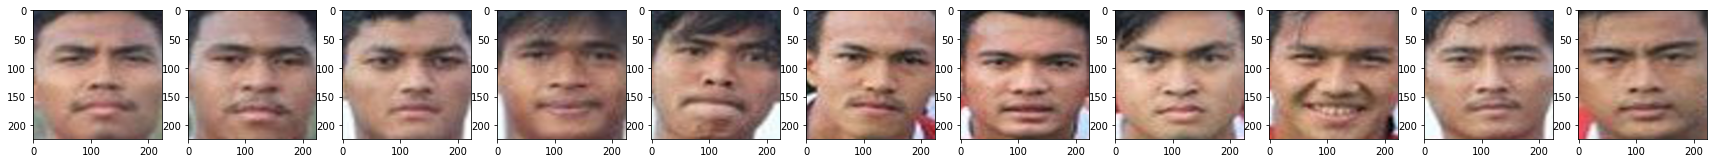

In [83]:
uploaded = files.upload()
filename = next(iter(uploaded))
detect(filename)